# Importo las librerías y creo el DataFrame

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from kmodes.kmodes import KModes



df = pd.read_csv("proyecto1/heart_failure_clinical_records_dataset.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

# Grafico los datos

Separo el conjunto de datos que cumplen con la hipótesis

Text(0, 0.5, 'personas')

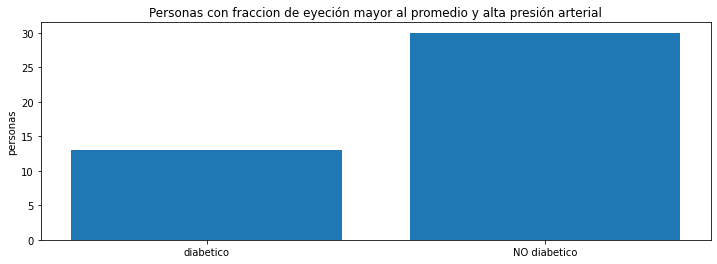

In [2]:
ej_fr_mean = df.ejection_fraction.mean()
# Separo el conjunto de datos que cumplen con la hipotesis
df_auxx = df.loc[(df.ejection_fraction > ej_fr_mean) & (df.high_blood_pressure == 1)]

tot = len(df_auxx)
tot_diabetes = len(df_auxx[df_auxx.diabetes == 1].count())
tot_no_diabetes = tot - tot_diabetes
tot_no_diabetes

plt.figure(figsize=(12, 4))
plt.bar(["diabetico", "NO diabetico"], [tot_diabetes, tot_no_diabetes])
plt.title("Personas con fraccion de eyeción mayor al promedio y alta presión arterial")
plt.ylabel("personas")

## Preparo los datos de interes
Y convierto a ejection_fraction en variable categórica 

In [3]:
columns = ["ejection_fraction", "high_blood_pressure", "diabetes"]
df_aux = df[columns]

df_aux.loc[df_aux["ejection_fraction"] > 38, "ejection_fraction"] = 1
df_aux.loc[(df_aux["ejection_fraction"] != 1), "ejection_fraction"] = 0
df_aux

/home/dario/.pyenv/versions/3.9.0/envs/core-changos/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/dario/.pyenv/versions/3.9.0/envs/core-changos/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


ejection_fraction  high_blood_pressure  diabetes
0                    0                    1         0
1                    0                    0         0
2                    0                    0         0
3                    0                    0         0
4                    0                    0         1
..                 ...                  ...       ...
294                  0                    1         1
295                  0                    0         0
296                  1                    0         1
297                  0                    0         0
298                  1                    0         0

[299 rows x 3 columns]

# Utilizo el Método del Codo
Para encontrar el K óptimo

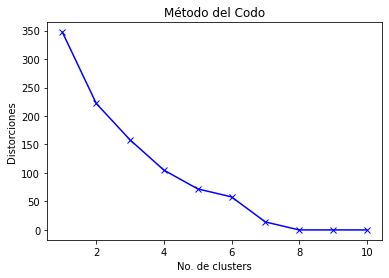

In [4]:
cost = []
for i in range(1,11):
    kmode = KModes(n_clusters=i, init = "random", n_init = 10)
    kmode.fit_predict(df_aux)
    cost.append(kmode.cost_)

plt.plot(range(1,11), cost, 'bx-')
plt.xlabel('No. de clusters')
plt.ylabel('Distorciones')
plt.title('Método del Codo')
plt.show()

# Utilizo el algoritmo K modes con K=8

In [5]:
kmode = KModes(n_clusters=8, init = "random")
clusters = kmode.fit_predict(df_aux)
df_aux['label'] = clusters

/tmp/ipykernel_23039/724901879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['label'] = clusters


# Analizando los grupos tengo que:

In [26]:
a = df_aux[df_aux['label'] == 1]
len(a)
# 1 1 1   16
# 1 1 0   29
len(a)

29